In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..', 'utils')))
from data_explorer import DataExplorer

In [2]:
df_2015 = pd.read_csv('../data/2015.csv')
df_2016 = pd.read_csv('../data/2016.csv')
df_2017 = pd.read_csv('../data/2017.csv')
df_2018 = pd.read_csv('../data/2018.csv')
df_2019 = pd.read_csv('../data/2019.csv')

In [14]:
print(df_2015.columns)
print(df_2016.columns)
print(df_2017.columns)
print(df_2018.columns)
print(df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

As we can see, we have different column names for each .csv file, so we need to change them to standard column names

In [4]:
columns = {
"Happiness Rank":"happiness_rank",
"Country":"country",
"Happiness Score":"happiness_score",
"Economy (GDP per Capita)":"GDP_per_capita",
"Health (Life Expectancy)":"life_expectancy",
"Freedom":"freedom",
"Trust (Government Corruption)":"perceptions_corruption",
"Generosity":"generosity"
}
df_2015.rename(columns=columns, inplace = True)
df_2015 = df_2015[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2015["year"] = 2015
df_2015.columns

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [5]:
columns = {
"Happiness Rank":"happiness_rank",
"Country":"country",
"Happiness Score":"happiness_score",
"Economy (GDP per Capita)":"GDP_per_capita",
"Health (Life Expectancy)":"life_expectancy",
"Freedom":"freedom",
"Trust (Government Corruption)":"perceptions_corruption",
"Generosity":"generosity"
}
df_2016.rename(columns=columns, inplace = True)
df_2016 = df_2016[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2016["year"] = 2016
df_2016.columns

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [6]:
columns = {
"Happiness.Rank":"happiness_rank",
"Country":"country",
"Happiness.Score":"happiness_score",
"Economy..GDP.per.Capita.":"GDP_per_capita",
"Health..Life.Expectancy.":"life_expectancy",
"Trust..Government.Corruption.":"perceptions_corruption",
"Freedom":"freedom",
"Generosity":"generosity"
}
df_2017.rename(columns=columns, inplace = True)
df_2017 = df_2017[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2017["year"] = 2017
df_2017.columns

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [7]:
columns = {
"Overall rank":"happiness_rank",
"Country or region":"country",
"Score":"happiness_score",
"GDP per capita":"GDP_per_capita",
"Healthy life expectancy":"life_expectancy",
"Freedom to make life choices":"freedom",
"Perceptions of corruption":"perceptions_corruption",
"Generosity":"generosity"
}
df_2018.rename(columns=columns, inplace = True)
df_2018 = df_2018[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2018["year"] = 2018
df_2018.columns

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [8]:
df_2019.drop(["Social support"], axis="columns", inplace=True)
columns = {
"Overall rank":"happiness_rank",
"Country or region":"country",
"Score":"happiness_score",
"GDP per capita":"GDP_per_capita",
"Healthy life expectancy":"life_expectancy",
"Freedom to make life choices":"freedom",
"Perceptions of corruption":"perceptions_corruption",
"Generosity":"generosity"
}
df_2019.rename(columns=columns, inplace = True)
df_2019 = df_2019[["country", "happiness_rank", "happiness_score", "GDP_per_capita", "life_expectancy", 
                   "freedom", "perceptions_corruption", "generosity"]]
df_2019["year"] = 2019
df_2018.columns

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [9]:
df = pd.concat([df_2016,df_2017,df_2018,df_2019])

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year'],
      dtype='object')

In [41]:
import country_converter as coco

# Crea un convertidor
cc = coco.CountryConverter()

# Crear una nueva columna 'ISO3' aplicando la conversión
df['ISO2'] = df['country'].apply(lambda x: cc.convert(names=x, to='ISO2'))
df['country'] = df['country'].apply(lambda x: cc.convert(names=x, to='name_official'))

In [54]:
df.to_csv('../data/happiness_dataset_merged.csv', index=False, sep=',', encoding='utf-8')
df.columns

Index(['country', 'happiness_rank', 'happiness_score', 'GDP_per_capita',
       'life_expectancy', 'freedom', 'perceptions_corruption', 'generosity',
       'year', 'ISO3'],
      dtype='object')

In [62]:
explorer = DataExplorer('../data/happiness_dataset_merged.csv')
df = explorer.get_mini_eda_html()

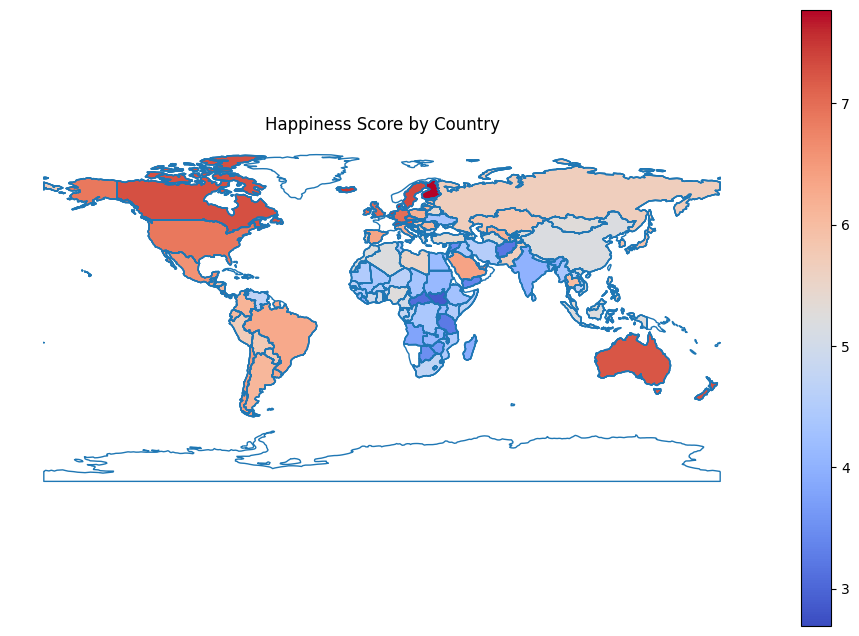

In [60]:
import geopandas as gpd
# Cargar el archivo geoespacial desde el archivo zip
world = gpd.read_file('../utils/ne_110m_admin_0_countries.zip')

# Unir los datos del shapefile con el DataFrame de felicidad basado en el código ISO3
world = world.merge(df, left_on='ISO_A2', right_on='ISO2', how='left')

# Crear el mapa de calor basado en el puntaje de felicidad
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(column='happiness_score', cmap='coolwarm', ax=ax, legend=True)

# Añadir título y quitar ejes
ax.set_title('Happiness Score by Country')
ax.set_axis_off()

plt.show()

se usó ISO2 ya que con ISO3 habían muchos paises si poder graficar

Pasa algo super chistoso con namibia ya que su codigo es NA, por lo que pandas lo interpreta como nulo, y no me lo muestra